<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/tools_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/tools_numpy.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

### [Video de apoyo a la lectura interactiva y experimental de este cuaderno]()

### [Vínculo al programa del curso:  ]()



In [1]:
import pandas as pd
from datetime import datetime

# Ruta del archivo principal
path = 'C:/Users/marco/Documentos/docencia/groups_list/g_lideres.xlsx'

def registrar_asistencia():
    """Registrar asistencia de estudiantes G-líderes en el mismo archivo g_lideres.xlsx"""
    
    # Leer todas las hojas existentes
    try:
        xls = pd.ExcelFile(path)
        df_estudiantes = pd.read_excel(xls, sheet_name="Estudiantes")
        df_asistencia = pd.read_excel(xls, sheet_name="Asistencia")
    except ValueError:
        # Si no existen hojas, inicializarlas
        df_estudiantes = pd.DataFrame(columns=["Nombre", "Programa"])
        df_asistencia = pd.DataFrame(columns=["Nombre", "Programa", "Taller", "Fecha"])
    
    print("=== Registro de Asistencia - G-Líderes ===")
    
    while True:
        nombre = input("\nIngrese el nombre completo del estudiante (ENTER para terminar): ").strip()
        if nombre == "":
            break
        
        # Verificar si el estudiante ya existe
        if nombre in df_estudiantes["Nombre"].values:
            programa = df_estudiantes.loc[df_estudiantes["Nombre"] == nombre, "Programa"].values[0]
            print(f"✅ {nombre} encontrado en la lista ({programa}).")
        else:
            programa = input(f"⚠️ {nombre} no está registrado. Ingrese el programa académico: ")
            nuevo_estudiante = pd.DataFrame([[nombre, programa]], columns=["Nombre", "Programa"])
            df_estudiantes = pd.concat([df_estudiantes, nuevo_estudiante], ignore_index=True)
            print(f"✅ {nombre} agregado a la lista de estudiantes.")
        
        # Registrar asistencia
        taller = input("Ingrese el nombre del taller: ")
        fecha = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        nuevo_registro = pd.DataFrame([[nombre, programa, taller, fecha]], 
                                      columns=["Nombre", "Programa", "Taller", "Fecha"])
        df_asistencia = pd.concat([df_asistencia, nuevo_registro], ignore_index=True)
        print(f"📌 Asistencia registrada para {nombre} en el taller '{taller}'.")
    
    # Guardar de nuevo en el mismo archivo
    with pd.ExcelWriter(path, engine="openpyxl", mode="w") as writer:
        df_estudiantes.to_excel(writer, sheet_name="Estudiantes", index=False)
        df_asistencia.to_excel(writer, sheet_name="Asistencia", index=False)
    
    print(f"\n📂 Registro actualizado en {path}")



In [ ]:
registrar_asistencia()

In [2]:
import pandas as pd
import numpy as np

# Cargar la lista de estudiantes desde el archivo CSV
path = 'C:/Users/marco/Documentos/docencia/groups_list/g_lideres.xlsx'
df = pd.read_excel(path)
df.index = range(1, len(df) + 1)
df.head(3)

,Nombre,Programa
1,marco julio cañas campillo,licenciatura en matemáticas


# 2. Dataset para predicción de otorgamiento de una tarjeta de crédito  




### Corrección propuesta



Definamos una **regla determinista y linealmente separable**:

* Si `(ingresos > 5,000,000) + (edad > 30) + (nivel_endeudamiento < 0.5) ≥ 2` → **OtorgarTarjeta = 1**,
* en caso contrario → **OtorgarTarjeta = 0**.

Esto asegura que cualquier par de variables predictores se pueda separar linealmente con un hiperplano.

---



###  Código corregido





Lo que pasa con tu código es que definiste la variable objetivo (`OtorgarTarjeta`) usando una **regla lógica de unión de rectas (AND/OR de condiciones)**, lo que en general NO garantiza **separabilidad lineal estricta**.



Para obtener un dataset **linealmente separable con una sola recta** en el plano (Edad vs IngresosMensuales), necesitamos que la frontera de decisión pueda escribirse como:

$$
a \cdot \text{Edad} + b \cdot \text{IngresosMensuales} + c = 0
$$

y la clase se defina en función del signo de esa expresión.



Aquí te dejo el código corregido y simplificado 👇:


In [9]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fijamos semilla para reproducibilidad
np.random.seed(702)

# Número de muestras
n_samples = 100

# Variables simuladas: solo 2 atributos
edad = np.random.randint(18, 70, n_samples)
ingresos_mensuales = np.random.randint(1_423_500, 10_000_000, n_samples)

# Definimos una recta de separación: y = 120000 * Edad + 1e6
umbral = 120_000 * edad + 1_000_000

# Regla determinista linealmente separable
aprobacion = (ingresos_mensuales > umbral).astype(int)

# Crear DataFrame
df = pd.DataFrame({
    'Edad': edad,
    'IngresosMensuales': ingresos_mensuales,
    'OtorgarTarjeta': aprobacion
})
df.index = range(1, len(df)+1)
df


,Edad,IngresosMensuales,OtorgarTarjeta
1,36,8227546,1
2,53,4473550,0
3,24,4073084,1
4,56,1556870,0
5,52,5714001,0
...,...,...,...
96,18,1724575,0
97,49,2946726,0
98,29,6179579,1
99,37,1931376,0


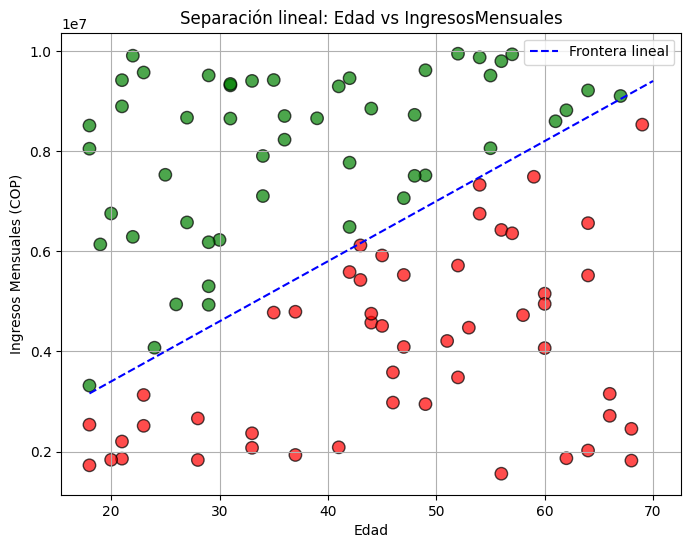

,Edad,IngresosMensuales,OtorgarTarjeta
1,36,8227546,1
2,53,4473550,0
3,24,4073084,1
4,56,1556870,0
5,52,5714001,0


<Figure size 640x480 with 0 Axes>

In [10]:
# Gráfico: Edad vs IngresosMensuales con separación lineal
plt.figure(figsize=(8,6))
colors = df['OtorgarTarjeta'].map({0: 'red', 1: 'green'})
plt.scatter(df['Edad'], df['IngresosMensuales'], c=colors, s=80, alpha=0.7, edgecolor='k')

# Línea de separación exacta
x_vals = np.array([18, 70])
y_vals = 120000 * x_vals + 1_000_000
plt.plot(x_vals, y_vals, '--b', label="Frontera lineal")

plt.xlabel("Edad")
plt.ylabel("Ingresos Mensuales (COP)")
plt.title("Separación lineal: Edad vs IngresosMensuales")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig(r"C:\Users\marco\Downloads\otorgar_tarjeta_linealmente_separable.png")
df.head()




### Cambios clave:

* Dejé **solo dos atributos**: `Edad` y `IngresosMensuales`.
* Definí la clase objetivo con una **única desigualdad lineal** respecto a una recta.
* Ahora **sí es estrictamente separable linealmente**: toda la clase positiva queda arriba de la recta y toda la negativa queda abajo.

---



👉 ¿Quieres que te deje parametrizable el **pendiente e intercepto de la recta** (para que la ajustes manualmente a tus datos)?



Ya que tus datos son **linealmente separables**, el **Perceptrón clásico** (de Rosenblatt, 1958) debería converger y aprender la frontera lineal que definimos.

Aquí te paso el código en Python paso a paso:

---



# Implementación del Perceptrón


🔹 Exactitud (accuracy): 0.565

🔹 Matriz de confusión:
 [[113   0]
 [ 87   0]]

🔹 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72       113
           1       0.00      0.00      0.00        87

    accuracy                           0.56       200
   macro avg       0.28      0.50      0.36       200
weighted avg       0.32      0.56      0.41       200



c:\Users\marco\Documentos\investigacion\ml_dl_intro\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\Documentos\investigacion\ml_dl_intro\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\Documentos\investigacion\ml_dl_intro\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

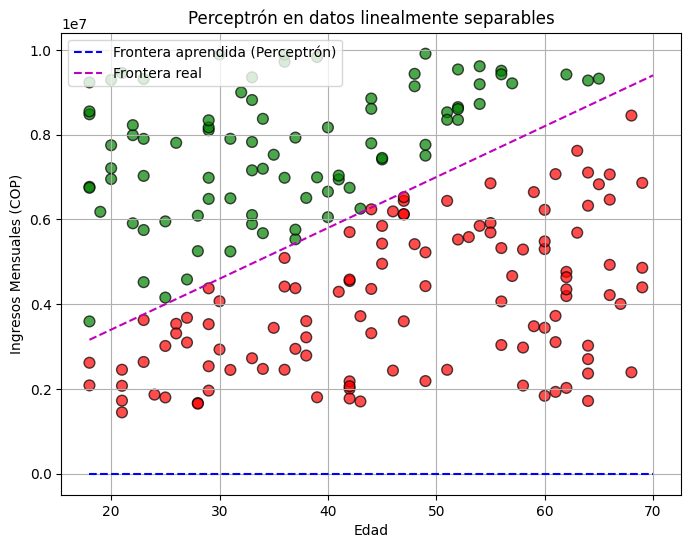

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ============================
# 1. Generar dataset linealmente separable
# ============================
np.random.seed(702)
n_samples = 200

edad = np.random.randint(18, 70, n_samples)
ingresos_mensuales = np.random.randint(1_423_500, 10_000_000, n_samples)

# Frontera lineal: y = 120000 * edad + 1e6
umbral = 120000 * edad + 1_000_000
aprobacion = (ingresos_mensuales > umbral).astype(int)

df = pd.DataFrame({
    "Edad": edad,
    "IngresosMensuales": ingresos_mensuales,
    "OtorgarTarjeta": aprobacion
})

# ============================
# 2. Dividir en predictores (X) y variable objetivo (y)
# ============================
X = df[["Edad", "IngresosMensuales"]].values
y = df["OtorgarTarjeta"].values

# ============================
# 3. Entrenar Perceptrón
# ============================
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X, y)

# ============================
# 4. Evaluar desempeño
# ============================
y_pred = perceptron.predict(X)
acc = accuracy_score(y, y_pred)

print("🔹 Exactitud (accuracy):", acc)
print("\n🔹 Matriz de confusión:\n", confusion_matrix(y, y_pred))
print("\n🔹 Reporte de clasificación:\n", classification_report(y, y_pred))

# ============================
# 5. Visualizar frontera de decisión
# ============================
plt.figure(figsize=(8,6))

# Puntos de datos
colors = df['OtorgarTarjeta'].map({0:'red', 1:'green'})
plt.scatter(df['Edad'], df['IngresosMensuales'], c=colors, s=60, alpha=0.7, edgecolor='k')

# Frontera aprendida por el perceptrón
x_vals = np.linspace(18, 70, 100)
# w0 + w1*x1 + w2*x2 = 0  ->  x2 = -(w0 + w1*x1)/w2
w0 = perceptron.intercept_[0]
w1, w2 = perceptron.coef_[0]
y_vals = -(w0 + w1*x_vals) / w2
plt.plot(x_vals, y_vals, '--b', label="Frontera aprendida (Perceptrón)")

# Frontera real (para comparar)
y_real = 120000 * x_vals + 1_000_000
plt.plot(x_vals, y_real, '--m', label="Frontera real")

plt.xlabel("Edad")
plt.ylabel("Ingresos Mensuales (COP)")
plt.title("Perceptrón en datos linealmente separables")
plt.legend()
plt.grid(True)
plt.show()




---

## 📊 ¿Qué hace este código?

1. **Genera los datos** (dos atributos: `Edad`, `IngresosMensuales`).
2. **Define una regla lineal de clasificación** → clase positiva si está por encima de la recta.
3. **Entrena un Perceptrón** usando `sklearn.linear_model.Perceptron`.
4. **Evalúa con métricas**: exactitud, matriz de confusión y reporte de clasificación.
5. **Grafica la frontera de decisión aprendida vs. la frontera real**.

Como los datos son **perfectamente separables**, deberías obtener `accuracy = 1.0` (o muy cercano). ✅

---

👉 ¿Quieres que te prepare también la **implementación desde cero (con NumPy)** del Perceptrón clásico (sin `sklearn`) para que tus estudiantes vean el algoritmo paso a paso?


# Implementación desde cero con numpy  

¡Excelente, Marco! 🚀
Vamos a implementar el **Perceptrón clásico desde cero con NumPy**, de forma que tus estudiantes vean el **algoritmo de aprendizaje paso a paso**:

---

## 📌 Perceptrón clásico con NumPy

```python
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 1. Generar dataset linealmente separable
# ============================
np.random.seed(702)
n_samples = 200

edad = np.random.randint(18, 70, n_samples)
ingresos_mensuales = np.random.randint(1_423_500, 10_000_000, n_samples)

# Frontera real: ingresos > 120000*edad + 1e6
umbral = 120000 * edad + 1_000_000
y = (ingresos_mensuales > umbral).astype(int)

X = np.c_[edad, ingresos_mensuales]

# ============================
# 2. Implementación Perceptrón clásico
# ============================
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.lr = learning_rate
        self.n_iter = n_iter
    
    def fit(self, X, y):
        # Convertir etiquetas a {-1, 1} (requisito del algoritmo clásico)
        y_ = np.where(y == 0, -1, 1)
        
        # Inicializar pesos
        self.w = np.zeros(X.shape[1])
        self.b = 0
        
        # Entrenamiento
        for _ in range(self.n_iter):
            for xi, target in zip(X, y_):
                # Regla de actualización si hay error
                condition = target * (np.dot(xi, self.w) + self.b)
                if condition <= 0:
                    self.w += self.lr * target * xi
                    self.b += self.lr * target
        return self
    
    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, 0)  # salida en {0,1}

# ============================
# 3. Entrenar perceptrón
# ============================
perceptron = Perceptron(learning_rate=0.000000001, n_iter=20)  # lr pequeño por escala de ingresos
perceptron.fit(X, y)

# Predicciones
y_pred = perceptron.predict(X)
acc = np.mean(y_pred == y)
print("🔹 Exactitud (accuracy):", acc)

# ============================
# 4. Visualizar frontera aprendida
# ============================
plt.figure(figsize=(8,6))

# Puntos de datos
colors = np.where(y==0, "red", "green")
plt.scatter(X[:,0], X[:,1], c=colors, s=60, alpha=0.7, edgecolor="k")

# Frontera aprendida
x_vals = np.linspace(18, 70, 100)
# w0*x1 + w1*x2 + b = 0  ->  x2 = -(w0*x1 + b)/w1
y_vals = -(perceptron.w[0]*x_vals + perceptron.b) / perceptron.w[1]
plt.plot(x_vals, y_vals, "--b", label="Frontera aprendida")

# Frontera real
y_real = 120000*x_vals + 1_000_000
plt.plot(x_vals, y_real, "--m", label="Frontera real")

plt.xlabel("Edad")
plt.ylabel("Ingresos Mensuales (COP)")
plt.title("Perceptrón clásico desde cero")
plt.legend()
plt.grid(True)
plt.show()
```

---

## 📊 Explicación del algoritmo

1. **Inicialización:** pesos y sesgo en cero.
2. **Regla de actualización:**

   * Si una muestra está mal clasificada:

     $$
     w \leftarrow w + \eta \cdot y_i \cdot x_i, \quad b \leftarrow b + \eta \cdot y_i
     $$
   * Donde $\eta$ es la tasa de aprendizaje.
3. **Iteraciones:** repite el proceso sobre el dataset varias veces.
4. **Predicción:** signo de $w \cdot x + b$.

---

✅ Con este código, tus estudiantes pueden **ver cómo el perceptrón ajusta los pesos paso a paso** hasta aprender la frontera lineal.

---

¿Quieres que te prepare también una **visualización animada del proceso de entrenamiento** (cómo la frontera va cambiando en cada época) para hacerlo más didáctico en clase?


# Visualización animada del proceso de entrenamiento

¡Perfecto, Marco! 🚀
Vamos a hacer una **visualización animada del entrenamiento del perceptrón**, para que tus estudiantes vean cómo la **frontera de decisión** va cambiando a lo largo de las épocas.

Aquí tienes el código:

---

## 📌 Perceptrón con animación de la frontera de decisión

```python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ============================
# 1. Generar dataset linealmente separable
# ============================
np.random.seed(702)
n_samples = 100

edad = np.random.randint(18, 70, n_samples)
ingresos_mensuales = np.random.randint(1_423_500, 10_000_000, n_samples)

# Frontera real: ingresos > 120000*edad + 1e6
umbral = 120000 * edad + 1_000_000
y = (ingresos_mensuales > umbral).astype(int)

X = np.c_[edad, ingresos_mensuales]

# ============================
# 2. Implementación Perceptrón con registro de pesos
# ============================
class Perceptron:
    def __init__(self, learning_rate=1e-9, n_iter=20):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.history = []  # para guardar pesos y bias en cada época
    
    def fit(self, X, y):
        y_ = np.where(y == 0, -1, 1)
        self.w = np.zeros(X.shape[1])
        self.b = 0
        
        for _ in range(self.n_iter):
            for xi, target in zip(X, y_):
                condition = target * (np.dot(xi, self.w) + self.b)
                if condition <= 0:
                    self.w += self.lr * target * xi
                    self.b += self.lr * target
            # guardar copia de los parámetros al final de cada época
            self.history.append((self.w.copy(), self.b))
        return self
    
    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, 0)

# ============================
# 3. Entrenar perceptrón
# ============================
perceptron = Perceptron(learning_rate=1e-9, n_iter=20)
perceptron.fit(X, y)

# ============================
# 4. Animación del entrenamiento
# ============================
fig, ax = plt.subplots(figsize=(8,6))

# Dibujar datos
colors = np.where(y==0, "red", "green")
ax.scatter(X[:,0], X[:,1], c=colors, s=60, alpha=0.7, edgecolor="k")

# Frontera real
x_vals = np.linspace(18, 70, 100)
y_real = 120000*x_vals + 1_000_000
ax.plot(x_vals, y_real, "--m", label="Frontera real")

# Línea inicial de decisión (será actualizada en la animación)
line, = ax.plot([], [], "--b", label="Frontera aprendida")

ax.set_xlim(15, 75)
ax.set_ylim(0, 11_000_000)
ax.set_xlabel("Edad")
ax.set_ylabel("Ingresos Mensuales (COP)")
ax.set_title("Entrenamiento del Perceptrón")
ax.legend()
ax.grid(True)

# Función de actualización de la animación
def update(frame):
    w, b = perceptron.history[frame]
    y_vals = -(w[0]*x_vals + b) / w[1]
    line.set_data(x_vals, y_vals)
    ax.set_title(f"Época {frame+1}")
    return line,

# Crear animación
ani = FuncAnimation(fig, update, frames=len(perceptron.history),
                    interval=700, blit=True, repeat=True)

plt.show()
```

---

### 🔎 ¿Qué verán tus estudiantes?

* Los **puntos rojos** son la clase negativa (rechazo).
* Los **puntos verdes** son la clase positiva (aprobación).
* La **línea magenta** es la frontera real (regla determinista).
* La **línea azul** es la frontera que el perceptrón va aprendiendo.
* En cada **época**, la línea azul se ajusta hasta converger.

---

¿Quieres que además te genere una **versión exportable a GIF/MP4** (con `matplotlib.animation`) para que puedas mostrar la animación en clase sin necesidad de ejecutar el notebook en vivo?


# Sobre la lectura interactiva y experimental  

La **lectura interactiva y experimental** de los cuadernos Jupyter diseñados para el curso de **Fundamentos de Lógica** implica un enfoque dinámico y práctico para el aprendizaje, donde los estudiantes no solo consumen información teórica, sino que también interactúan con el contenido, modifican ejemplos, ejecutan código y experimentan con los conceptos lógicos en un entorno computacional. A continuación, se detallan las características clave de este enfoque:

---



### **1. Lectura Interactiva**  
- **Manipulación directa del contenido**: Los estudiantes pueden ejecutar celdas de código, modificar fórmulas lógicas o ejemplos, y observar cómo cambian los resultados en tiempo real.  
- **Visualización interactiva**: Uso de gráficos, diagramas (como árboles semánticos o tablas de verdad) o herramientas que respondan a entradas del usuario para ilustrar conceptos como validez, consistencia o inferencia.  
- **Retroalimentación inmediata**: Los cuadernos pueden incluir ejercicios con autoevaluación (ejecutando código que verifica soluciones) o explicaciones emergentes al resolver problemas.  

---



### **2. Lectura Experimental**  
- **Aprendizaje basado en prueba y error**: Los estudiantes pueden "jugar" con estructuras lógicas (por ejemplo, modificar conectores en una fórmula proposicional y ver cómo afecta su tabla de verdad).  
- **Simulación de escenarios**: Por ejemplo, modelar argumentos en lógica de primer orden y evaluar su corrección mediante ejecución de código (usando librerías como `sympy` o herramientas ad-hoc).  
- **Exploración guiada y abierta**: Se incluyen secciones con consignas del tipo *"¿Qué pasa si cambias este axioma?"* o *"Intenta construir un contraejemplo"* para fomentar la curiosidad.  

---



### **3. Componentes clave de los cuadernos**  
- **Fragmentos de código ejecutable**: Para evaluar expresiones lógicas, automatizar pruebas o implementar algoritmos (ej: verificación de tautologías).  
- **Celdas con texto teórico y preguntas reflexivas**: Integradas con ejemplos prácticos que requieren intervención activa (ej: *"Define aquí tu propia fórmula y comprueba si es satisfacible"*).  
- **Enlaces a recursos externos**: Como demostradores en línea o lecturas complementarias para profundizar.  

---



### **4. Beneficios pedagógicos**  
- **Enganche activo**: Combina teoría y práctica sin salir del entorno digital.  
- **Personalización**: Los estudiantes pueden ajustar el ritmo y profundidad de su aprendizaje.  
- **Preparación para aplicaciones reales**: Familiariza a los estudiantes con herramientas usadas en investigación (ej: Python para lógica simbólica).  

---



### **Ejemplo concreto**  
Un cuaderno podría incluir:  
1. Una explicación de *modus ponens* con una fórmula predefinida (`p → q`, `p`, luego `q`).  
2. Una celda interactiva donde el estudiante modifique `p` o `q` y observe cómo falla la regla si las premisas cambian.  
3. Un ejercicio para programar un verificador de *modus ponens* usando diccionarios de Python.  



Este enfoque transforma la lógica (a menudo abstracta) en una experiencia tangible y adaptable.

# Presentación de la estructura de la clase  

# Desarrollo de habilidades Metacognitivas en enseñanza con metodología IAE 



Desarrollar habilidades metacognitivas en los estudiantes dentro de una **Investigación Acción Educativa (IAE)** implica un proceso cíclico de reflexión, acción y evaluación. Aquí te propongo una estrategia estructurada en fases, alineada con la IAE, para fomentar la metacognición:

---



### **1. Diagnóstico Inicial (Fase de Observación)**  
- **Identifica el nivel metacognitivo actual**:  
  - Realiza cuestionarios, entrevistas o actividades reflexivas (ej.: "¿Cómo estudiaste para el último examen? ¿Qué te funcionó o no?").  
  - Observa si los estudiantes pueden explicar sus procesos de aprendizaje o identificar dificultades.  

- **Registra evidencias**: Anota cómo los estudiantes planifican, monitorean y evalúan sus tareas (ej.: diarios de aprendizaje, grabaciones de debates).  

---



### **2. Diseño de Intervenciones (Fase de Planificación)**

  
**a. Enseñanza explícita de estrategias metacognitivas**:  
  - **Modelado**: Muestra cómo *tú* piensas al resolver un problema ("Pensamiento en voz alta"). Ejemplo:  
    *"Primero, voy a leer el objetivo de la clase. Luego, revisaré si entiendo los conceptos clave..."*.  
  - **Listas de verificación (checklists)**: Proporciona guías para autoevaluarse (ej.: "¿Puedo explicar este tema con mis propias palabras?").  



**b. Herramientas para la autorregulación**:  
  - **Diarios de aprendizaje**: Pide que registren:  
    - *"¿Qué aprendí hoy?"* (conocimiento).  
    - *"¿Cómo lo aprendí?"* (proceso).  
    - *"¿Qué me falta por entender?"* (brechas).  
  - **Rúbricas de autoevaluación**: Incluye criterios como: *"Puedo resolver ejercicios sin ayuda"* o *"Sé dónde buscar información confiable"*.  

**c. Espacios de reflexión colaborativa**:  
  - **Debates metacognitivos**: En grupos, discuten: *"¿Qué estrategia usamos? ¿Funcionó? ¿Por qué?"*.  
  - **Peer feedback**: Intercambian comentarios sobre sus procesos (ej.: "Tú organizaste bien tus ideas, pero podrías revisar las fuentes").  

---



### **3. Implementación (Fase de Acción)**  
- **Integra la metacognición en las actividades cotidianas**:  
  - Antes de una tarea: *"¿Qué sabes ya sobre este tema? ¿Cómo planeas abordarlo?"*.  
  - Durante la tarea: *"¿Estás siguiendo tu plan? ¿Necesitas ajustarlo?"*.  
  - Después: *"¿Lograste el objetivo? ¿Qué cambiarías la próxima vez?"*.  
- **Usa preguntas clave**:  
  - *"¿Qué parte fue más difícil? ¿Por qué?"* (identificación de obstáculos).  
  - *"Si tuvieras que enseñarle esto a un compañero, ¿cómo lo harías?"* (transferencia).  

---

### **4. Evaluación y Reflexión (Fase de Observación/Reflexión)**  
- **Analiza el impacto**: Compara evidencias pre y post intervención (ej.: diarios, desempeño en tareas).  
- **Reflexión grupal**: Realiza una sesión donde los estudiantes compartan:  
  - *"¿Qué estrategias metacognitivas les ayudaron más?"*.  
  - *"¿Cómo se sintieron al gestionar su aprendizaje?"*.  
- **Ajusta la intervención**: Si notas que persisten dificultades, propón nuevas herramientas (ej.: mapas conceptuales para organizar ideas).  

---

### **5. Iteración (Ciclo de IAE)**  
Repite el ciclo con ajustes basados en los hallazgos. Por ejemplo:  
- Si los estudiantes no identifican errores, introduce actividades de *análisis de errores* ("¿Por qué te equivocaste? ¿Cómo corregirlo?").  
- Si les cuesta planificar, usa herramientas visuales como *diagramas de flujo* para secuenciar pasos.  

---

### **Ejemplo Práctico**  
**Situación**: Estudiantes no revisan sus errores en matemáticas.  
- **Intervención**:  
  1. **Modelado**: Resuelves un problema cometiendo un error adrede y muestras cómo detectarlo.  
  2. **Checklist**: "¿Revisé cada paso? ¿Mi respuesta tiene sentido?".  
  3. **Diario**: "Hoy cometí un error en... Lo corregí cambiando...".  

---

### **Claves para el Éxito**  
- **Consistencia**: Integra la metacognición en todas las clases, no como actividad aislada.  
- **Andamiaje**: Reduce gradualmente la guía del docente a medida que los estudiantes ganan autonomía.  
- **Cultura de error**: Normaliza los errores como parte del aprendizaje ("¿Qué podemos aprender de esto?").  

La metacognición no solo mejora el logro académico, sino que empodera a los estudiantes para ser aprendices autónomos y resilientes. En la IAE, este proceso se enriquece al ser colaborativo (docente-estudiantes) y basado en evidencia concreta.  

¿Te gustaría profundizar en alguna herramienta específica o ajustar la estrategia a un nivel educativo en particular?

# Calendario Académico Semestre 2025-2  






# Cursos que orienta el profesor Marco Julio Cañas Campillo en 2025  

1. Cálculo Vectorial para Ingeniería Agropecuaria
2. Análisis Numérico para Licenciatura en Matemáticas. 
3. Práctica Pedagógica V para Licenciatura en Educación Infantil
4. Fundamentos de Lógica para Licenciatura en Matemáticas 


# Horario de clases del profesor Marco

* Lunes 8-12: Cálculo Vectorial
* Martes 8-12 M: Análisis Numérico. 
* Miércoles 10 a 11 M: Machine Learnig
* Miércoles de 3 a 4 de la tarde: ARIMA
* Jueves 2 a 6 PM: Práctica Pedagógica V: Desarrollo del pensamiento matemático en   
  la infancia. 
* Viernes 8 - 12 M: Fundamentos de Lógica. 
* Sábados 8-12 Asesorías y espacio para retroalimentación y apoyo al trabajo independiente  
  y desarrollo de habilidades metacognitivas. 

# Coordinador de los cursos de la Facultad de Educación para regiones:    

Andrés Vélez: regioneducacion.fedu@udea.edu.co  
Coordinador Regiones  
Facultad de Educación  
Universidad de Antioquia  

## Monitores
* Manuel San Juan Serrano: Contactar escribiendo al correo: manuel.serrano1@udea.edu.co
* Yeifry Sebastián Uribe: Contactar escribiendo al correo: yeifry.uribe@udea.edu.co

## Referentes 

* [Jupyter Book de fundamentos_logica](file:///C:/Users/marco/Documentos/docencia/fundamentos_logica/fundamentos_logica_book/_build/html/index.html)


* [Decargue Crocodile Clip aquí](https://crocodileclips.net/descargar-crocodile-clips/)

* [Matemáticas discretas Una introducción abierta, 3ª edición](https://discrete.openmathbooks.org/dmoi3.html)  
  
* [Desarrollo del pensamiento matemático con calculadora Casio ](https://bibliotecadigital.udea.edu.co/entities/publication/17180405-9f1d-4800-aa7c-e6369779cece)

* [CALCULO I DE UNA VARIABLE Ron Larson-Bruce Edwards. Mc Graw Hill. 9º Edición](https://www.academia.edu/42139251/CALCULO_I_DE_UNA_VARIABLE_Ron_Larson_Bruce_Edwards_Mc_Graw_Hill_9o_Edici%C3%B3n)   
  

* [Grajales Vanegas, L. M., Restrepo Estrada, C. E., Restrepo Ochoa, S. I., & Ruíz De Villalba, F. (2015). Matemáticas I para las ciencias económicas.](https://bibliotecadigital.udea.edu.co/handle/10495/3010)
  
* R. Duval y Semiosis y pensamiento humano, 2.ª ed. Cali, Colombia: Programa Editorial Universidad del Valle, 2017. [En línea]. Disponible en: https://programaeditorial.univalle.edu.co/gpd-semiosis-y-pensamiento-humano-9789587655278-63324cdb0f6b3.html

* [Aylwin, C. U. (2011). Lógica, conjuntos y números. Universidad de los Andes, Consejo de Publicaciones, Colección: Ciencias Básicas, Serie: Matemáticas.](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.u-cursos.cl/ciencias/2011/1/MC110/1/material_docente/bajar?id_material=574722)
  
* [Chollet, F. (2021). Deep learning with Python. Simon and Schuster.](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://tanthiamhuat.wordpress.com/wp-content/uploads/2018/03/deeplearningwithpython.pdf)  
  
* [Watson, S., Stewart, J., & Redlin, L. (2009). Precálculo. Matemáticas para el cálculo.](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://students.aiu.edu/submissions/profiles/resources/onlineBook/k6L8A3_precalculo_-_matematicas_para_el_calculo-1.pdf)  

* [Purcell, E. J., Varberg, D., & Rigdon, S. E. (2007). Cálculo diferencial e integral. Pearson Educación.](https://github.com/marco-canas/calculo/blob/main/referents/purcell/purcell_calculo.pdf)

  

* [stewart cálculo](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/EZgXZjAp8QxPqOAim2hs6LcBNPLGjSHf-xwYnUVYkwa04w?e=RZdTCy)  


* [Recomendación de la UNESCO sobre ciencia abierta](https://unesdoc.unesco.org/ark:/48223/pf0000379949_spa)

* [chatGPT](https://openai.com/blog/chatgpt)  

* [Géron, A. (2017). Hands-on machine learning with scikit-learn and tensorflow: Concepts. Tools, and Techniques to build intelligent systems.](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/http://14.139.161.31/OddSem-0822-1122/Hands-On_Machine_Learning_with_Scikit-Learn-Keras-and-TensorFlow-2nd-Edition-Aurelien-Geron.pdf)   



* [McKinney, W. (2012). Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. " O'Reilly Media, Inc.".](https://wesmckinney.com/book/) 

# Como estudiante, encuentro que...   

F: Mis Fortalezas son:     
O: Mis Oportunidades son:    
D: Mis Debilidades son:    
A: Lo que Amenazas mi aprendizaje es:  

### [Evaluamos al profesor Marco Cañas Aquí](https://forms.office.com/Pages/ResponsePage.aspx?id=IefhmYRxjkmK_7KtTlPBwkanXIs1i1FEujpsZgO6dXpUREJPV1kxUk1JV1ozTFJIQVNIQjY5WEY3US4u)

### Continue su aprendizaje en la siguiente clase a través del siguiente [vínculo]()

## Agradecimientos  

Doy gracias a Dios por la vida de mi Hijo Joseph Cañas Osorio y la madurez que ha alcanzado. Este hijo me enorgullece y me hace falta abrazarlo cada día. 

Y a mi esposa Yasmira Emperatriz Barboza Mogollón por su apoyo, orientación y acompañamiento. 